In [1]:
#通过图片进行PCA之后，观看经过SVD矩阵分解之后，查看分离之后的矩阵
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

E:\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
faces=fetch_lfw_people(min_faces_per_person=60)

In [4]:
faces.data.shape

(1348, 2914)

In [5]:
faces.images.shape

(1348, 62, 47)

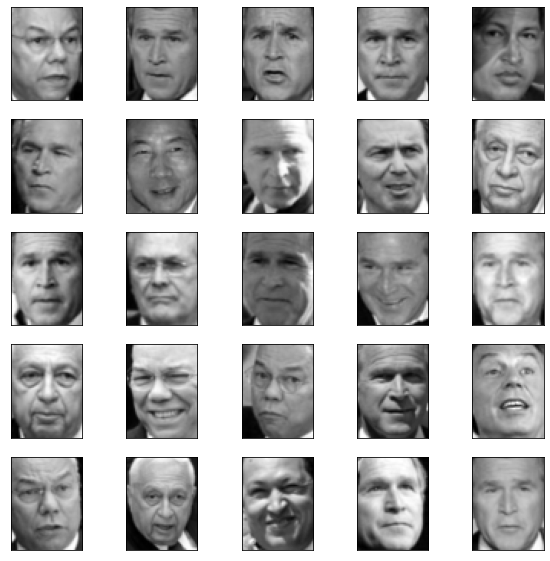

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(faces.images[i],cmap="gray")

In [26]:
a=np.arange(20).reshape(4,5)

In [27]:
#将二维的变成一维的
a=a.flat

In [28]:
[*a]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [47]:
pca=PCA(n_components=0.97,svd_solver="full")
pca=pca.fit(faces.data)

In [48]:
pca.components_.shape

(230, 2914)

In [49]:
pca.explained_variance_ratio_.sum()

0.9701918

In [54]:
V=pca.components_.reshape(pca.components_.shape[0],62,47)

In [56]:
V.shape

(230, 62, 47)

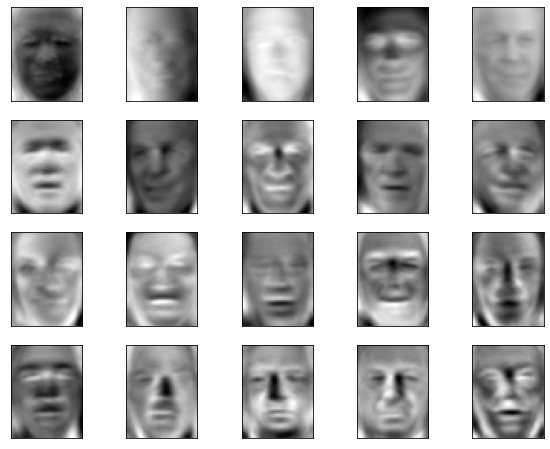

In [60]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(V[i],cmap="gray")

In [63]:
V_real=PCA(n_components=0.97,svd_solver="full").fit_transform(faces.data)
V_real.shape
# plt.figure(figsize=(10,10))
# for i in range(20):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(V_real[i],cmap="gray")  

(1348, 230)

In [64]:
#将经过PCA降维后的数据，重新逆转：
V_inver=pca.inverse_transform(V_real)

In [71]:
V_inver=V_inver.reshape(V_inver.shape[0],62,47)

In [72]:
V_inver

array([[[ 1.42363037e+02,  1.36183228e+02,  1.28863342e+02, ...,
          6.47393799e+01,  7.13164520e+01,  7.13295517e+01],
        [ 1.41798904e+02,  1.35840973e+02,  1.27578156e+02, ...,
          6.57724228e+01,  7.16815720e+01,  7.25225067e+01],
        [ 1.41304382e+02,  1.35280365e+02,  1.26294418e+02, ...,
          6.90210266e+01,  7.41130142e+01,  7.18612061e+01],
        ...,
        [ 1.47772064e+02,  1.53700638e+02,  1.43368561e+02, ...,
         -2.46616364e+00, -1.04766846e-01,  1.64118958e+00],
        [ 1.49753250e+02,  1.64753113e+02,  1.58758545e+02, ...,
          1.65778351e+00,  1.36553192e+00,  1.54472351e-01],
        [ 1.47208618e+02,  1.60469894e+02,  1.60719955e+02, ...,
         -4.79607391e+00, -3.94176483e+00, -3.41559601e+00]],

       [[ 6.10833969e+01,  6.44593048e+01,  6.90183563e+01, ...,
          8.31804047e+01,  8.03071747e+01,  7.63512115e+01],
        [ 6.69004211e+01,  7.02600632e+01,  7.68922729e+01, ...,
          8.07391281e+01,  8.21838455e

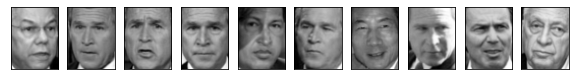

In [80]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(faces.images[i],cmap="gray")
#     plt.imshow(V_inver[j],cmap="gray")

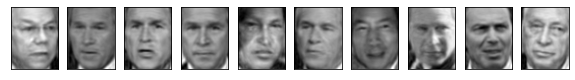

In [82]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(V_inver[i],cmap="gray")